In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's\n\n"

In [52]:
dataset = pd.read_csv(r"HousingData.csv")
dataset.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Description 

In [53]:
print(dataset.keys())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [54]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [55]:
cols = dataset.keys()

preparation

In [56]:
dataset['price'] = dataset.iloc[:,-1].values

In [57]:
dataset['price']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [58]:
dataset = dataset.drop("MEDV", axis=1)

Summarise stats of data

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [60]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


MIssing values

In [61]:
dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
price       0
dtype: int64

In [62]:
dataset = dataset.fillna(dataset.mean())
#df = dataset.interpolate()

Exploratory data analysis


Correlation

In [63]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


In [64]:
import seaborn as sns


In [65]:
#sns.pairplot(dataset)

Text(0, 0.5, 'price')

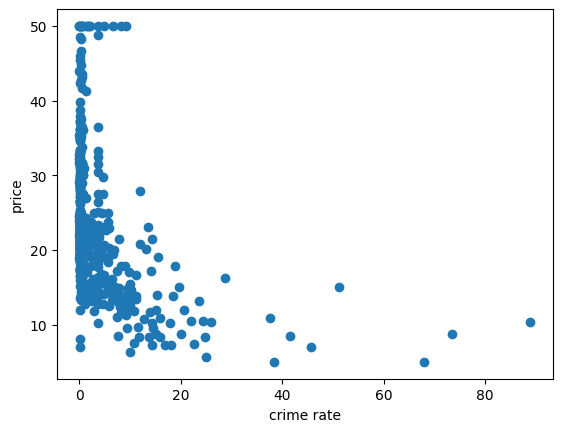

In [66]:
plt.scatter(dataset['CRIM'],dataset['price'])
plt.xlabel("crime rate")
plt.ylabel("price")

Text(0, 0.5, 'price')

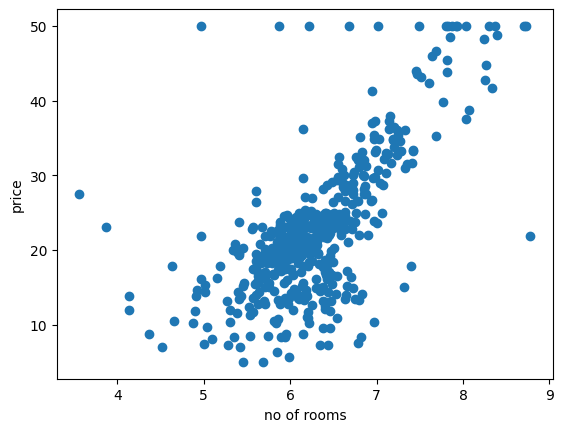

In [67]:
plt.scatter(dataset['RM'],dataset['price'])
plt.xlabel("no of rooms")
plt.ylabel("price")

<Axes: xlabel='RM', ylabel='price'>

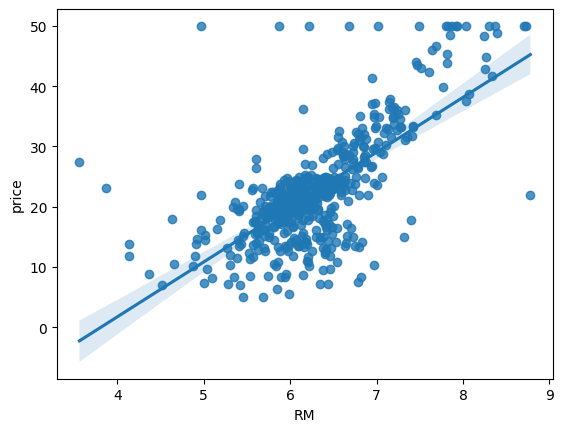

In [68]:
sns.regplot(x="RM", y ='price',data=dataset,order=1)

<Axes: xlabel='CHAS', ylabel='price'>

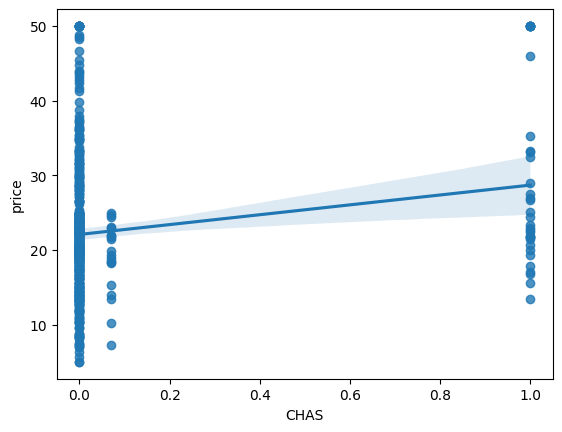

In [69]:
sns.regplot(x="CHAS", y ='price',data=dataset,order=1)

In [70]:
dataset
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [71]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432


In [72]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

train test split

In [73]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(X,y,test_size=0.25,random_state=1)

In [74]:
xTrain

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
172,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5,296,16.6,396.90,14.69
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4,281,19.0,396.90,5.29
46,0.18836,0.0,6.91,0.0,0.448,5.786,33.3,5.1004,3,233,17.9,396.90,14.15
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4,304,18.4,395.21,10.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1,315,16.4,395.18,9.25
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24,666,20.2,396.90,19.37
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8,307,17.4,376.75,10.88


standard scaling

In [75]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()


In [76]:
xTrain = scalar.fit_transform(xTrain)
xTest = scalar.transform(xTest)

In [77]:
import pickle
pickle.dump(scalar,open("scaling.pkl",'wb'))

model training

In [78]:

from sklearn.linear_model import LinearRegression

In [79]:
reg = LinearRegression()


In [80]:
reg.fit(xTrain, yTrain)

LinearRegression()

Print the coefficinet

In [81]:
reg.coef_

array([-1.14819127,  1.20104447, -0.10677141,  0.73790767, -2.38849653,
        2.18085261, -0.26690428, -3.2846785 ,  2.37938414, -1.53226061,
       -2.08231967,  0.53385523, -3.51958427])

In [82]:
reg.intercept_

22.344591029023746

parameters

In [83]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Prediction

In [84]:
reg_pred = reg.predict(xTest)

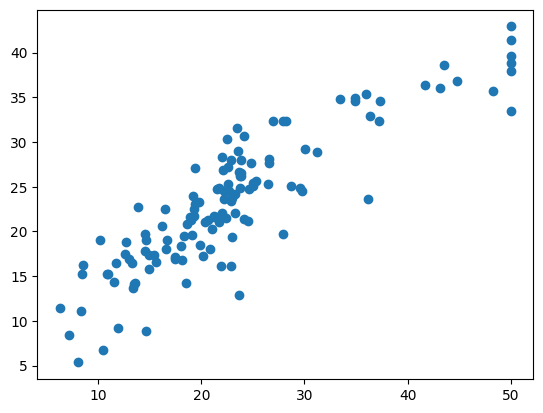

In [85]:
plt.scatter(yTest,reg_pred)

In [86]:
error = yTest-reg_pred

c:\Users\jayhe\Music\Projects\endtoendML\bostonHousePricing\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


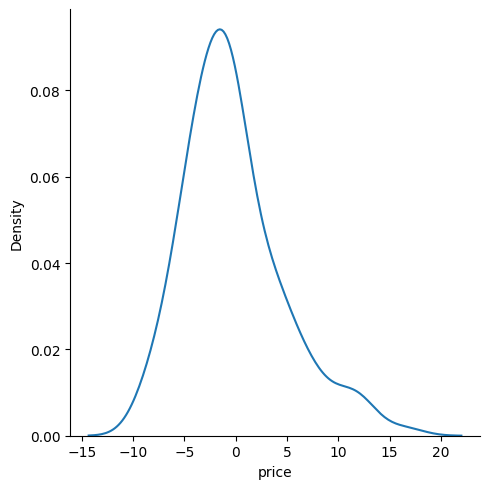

In [87]:
sns.displot(error,kind='kde')

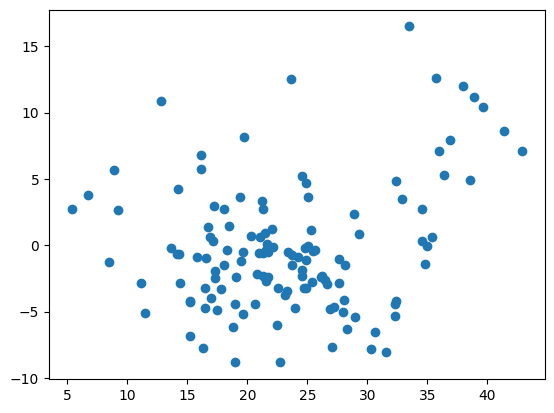

In [88]:
plt.scatter(reg_pred,error) # residual plot

performance matrix

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(yTest,reg_pred))
print(mean_squared_error(yTest,reg_pred))
print(np.sqrt(mean_squared_error(yTest,reg_pred)))

3.695612842595309
23.358874297460307
4.833101933278493


r square and adjusted square

r_square(coef of determination) = 1- [(sum of squares of error)/(total sum of squares)]


adjusted_r_square = 1 - [(1-r_square)*(n-1)/(n-k-1)]
n - no of obs
k  - no of predictor variable

In [90]:
from sklearn.metrics import r2_score
score = r2_score(yTest,reg_pred)
score
# more towards the 1 more better model is

0.7641910534384353

In [91]:
score2 = 1-((1-score)*(len(yTest)-1)/(len(yTest)-xTest.shape[1]-1))
score2

0.7370625905596713

New data Prediction

In [92]:
data = dataset.iloc[0,:-1].values
data = data.reshape(1,-1)
data.shape



(1, 13)

In [93]:
data = scalar.transform(data)

c:\Users\jayhe\Music\Projects\endtoendML\bostonHousePricing\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [94]:
reg.predict(data)

array([30.00813796])

Pickling the model for deployment

In [95]:
import pickle

In [96]:
pickle.dump(reg, open("regModel.pkl",'wb'))

In [97]:
pickle_model = pickle.load(open("regModel.pkl",'rb'))